/home/ancao/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1.012396663427352905e-01
- 1.012396663427352905e-01.1
- 1.012396663427352905e-01.2
- 1.033057868480682373e-01
- 1.053718999028205872e-01
- ...
Feature names seen at fit time, yet now missing:
- 0.000000000000000000e+00.65
- 0.000000000000000000e+00.66
- 0.000000000000000000e+00.67
- 0.000000000000000000e+00.68
- 0.000000000000000000e+00.69
- ...

  warnings.warn(message, FutureWarning)
/home/ancao/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for al

Accuracy: 0.91
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     14577
         1.0       0.84      0.41      0.55       418
         2.0       0.60      0.35      0.44      1120
         3.0       0.64      0.24      0.35       152
         4.0       0.96      0.89      0.92      1244

    accuracy                           0.91     17511
   macro avg       0.79      0.57      0.64     17511
weighted avg       0.90      0.91      0.90     17511



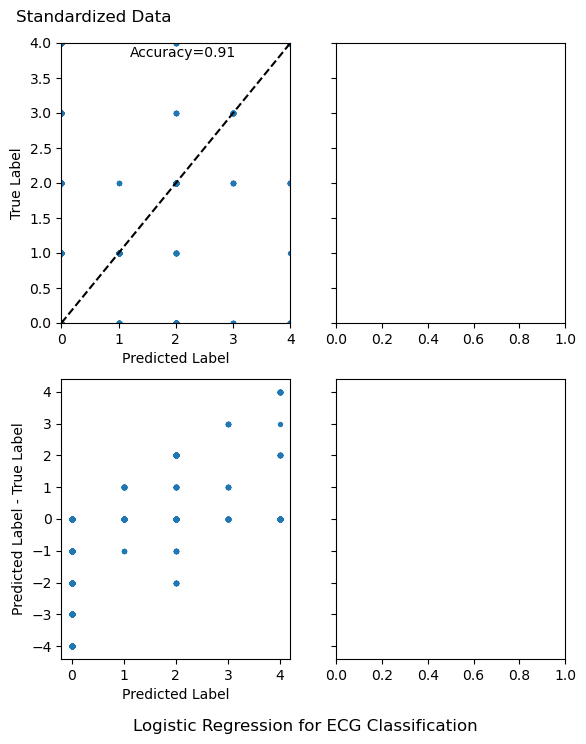

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df_train = pd.read_csv('mitbih_train.csv')
df_test = pd.read_csv('mitbih_test.csv')

# Split data into features and target
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy score and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Plot the results
f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

ax0[0].scatter(y_pred, y_test, s=8)
ax0[0].plot([0, 4], [0, 4], "--k")
ax0[0].set_ylabel("True Label")
ax0[0].set_xlabel("Predicted Label")
ax0[0].text(
    s="Standardized Data", x=-0.8, y=4.3, fontsize=12, multialignment="center"
)
ax0[0].text(
    1.2, 3.8, r"Accuracy=%.2f" % accuracy,
)
ax0[0].set_xlim([0, 4])
ax0[0].set_ylim([0, 4])
ax1[0].scatter(y_pred, (y_pred - y_test), s=8)
ax1[0].set_ylabel("Predicted Label - True Label")
ax1[0].set_xlabel("Predicted Label")

f.suptitle("Logistic Regression for ECG Classification", y=0.035)

plt.show()
